In [6]:
import os
import json
from shutil import move

def organize_videos(video_folder, metadata_path, output_folder):
    """
    Organizes videos into FAKE and REAL folders based on metadata.

    Parameters:
    - video_folder: Path to the folder containing all videos.
    - metadata_path: Path to the metadata JSON file.
    - output_folder: Path to the folder where organized videos will be saved.
    """
    # Load metadata
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)

    # Create output folders for FAKE and REAL videos
    fake_folder = os.path.join(output_folder, "FAKE")
    real_folder = os.path.join(output_folder, "REAL")
    os.makedirs(fake_folder, exist_ok=True)
    os.makedirs(real_folder, exist_ok=True)

    # Iterate over videos in metadata
    for video, details in metadata.items():
        video_path = os.path.join(video_folder, video)
        if not os.path.exists(video_path):
            print(f"Video {video} not found in {video_folder}. Skipping.")
            continue

        # Determine destination folder
        if details['label'] == 'FAKE':
            dest_folder = fake_folder
        elif details['label'] == 'REAL':
            dest_folder = real_folder
        else:
            print(f"Unknown label for video {video}. Skipping.")
            continue

        # Move video to the appropriate folder
        move(video_path, os.path.join(dest_folder, video))
        print(f"Moved {video} to {dest_folder}")

# Paths (replace with your actual paths)
video_folder = "train_sample_videos"  # Folder containing all videos
metadata_path = "metadata.json"  # Path to metadata.json
output_folder = "organized_video_frames"  # Folder to store organized videos

# Organize videos
organize_videos(video_folder, metadata_path, output_folder)


Moved aagfhgtpmv.mp4 to organized_video_frames/FAKE
Moved aapnvogymq.mp4 to organized_video_frames/FAKE
Moved abarnvbtwb.mp4 to organized_video_frames/REAL
Moved abofeumbvv.mp4 to organized_video_frames/FAKE
Moved abqwwspghj.mp4 to organized_video_frames/FAKE
Moved acifjvzvpm.mp4 to organized_video_frames/FAKE
Moved acqfdwsrhi.mp4 to organized_video_frames/FAKE
Moved acxnxvbsxk.mp4 to organized_video_frames/FAKE
Moved acxwigylke.mp4 to organized_video_frames/FAKE
Moved aczrgyricp.mp4 to organized_video_frames/FAKE
Moved adhsbajydo.mp4 to organized_video_frames/FAKE
Moved adohikbdaz.mp4 to organized_video_frames/FAKE
Moved adylbeequz.mp4 to organized_video_frames/FAKE
Moved aelfnikyqj.mp4 to organized_video_frames/REAL
Moved aelzhcnwgf.mp4 to organized_video_frames/FAKE
Moved aettqgevhz.mp4 to organized_video_frames/FAKE
Moved aevrfsexku.mp4 to organized_video_frames/FAKE
Moved afoovlsmtx.mp4 to organized_video_frames/REAL
Moved agdkmztvby.mp4 to organized_video_frames/FAKE
Moved agqphd

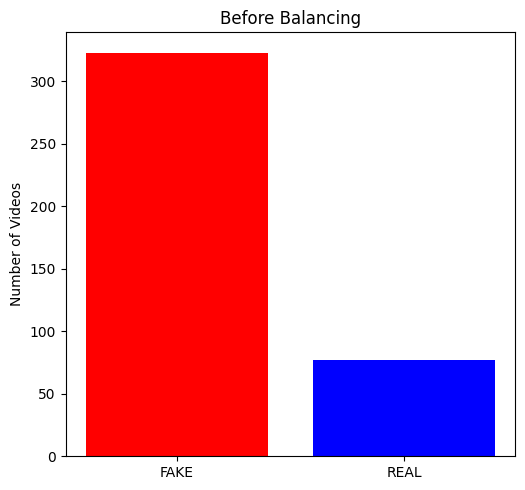

Oversampled REAL videos to match FAKE videos.


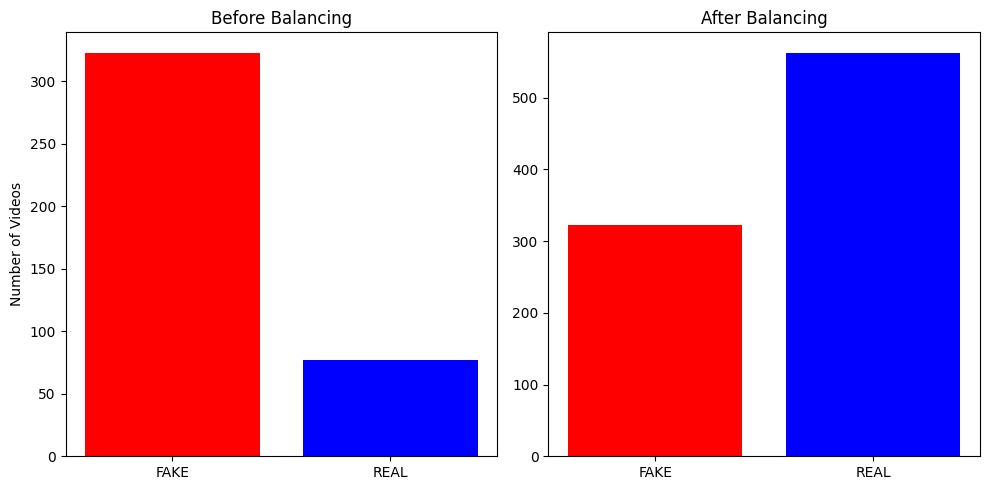

In [24]:
import os
import matplotlib.pyplot as plt
from shutil import copy2
import random

def count_videos(fake_folder, real_folder):
    """
    Counts the number of videos in FAKE and REAL folders.

    Parameters:
    - fake_folder: Path to the FAKE videos folder.
    - real_folder: Path to the REAL videos folder.

    Returns:
    - A tuple with the count of FAKE and REAL videos.
    """
    fake_count = len([f for f in os.listdir(fake_folder) if os.path.isfile(os.path.join(fake_folder, f))])
    real_count = len([f for f in os.listdir(real_folder) if os.path.isfile(os.path.join(real_folder, f))])
    return fake_count, real_count

def balance_videos(fake_folder, real_folder, balanced_real_folder):
    """
    Balances the dataset by oversampling REAL videos to match FAKE videos.

    Parameters:
    - fake_folder: Path to the FAKE videos folder.
    - real_folder: Path to the REAL videos folder.
    - balanced_real_folder: Path to save the oversampled REAL videos.
    """
    fake_videos = [os.path.join(fake_folder, f) for f in os.listdir(fake_folder) if os.path.isfile(os.path.join(fake_folder, f))]
    real_videos = [os.path.join(real_folder, f) for f in os.listdir(real_folder) if os.path.isfile(os.path.join(real_folder, f))]

    # Create the balanced real folder
    os.makedirs(balanced_real_folder, exist_ok=True)

    # Oversample REAL videos
    for _ in range(len(fake_videos) - len(real_videos)):
        video_to_duplicate = random.choice(real_videos)
        video_name = f"dup_{_}_{os.path.basename(video_to_duplicate)}"
        copy2(video_to_duplicate, os.path.join(balanced_real_folder, video_name))

    print(f"Oversampled REAL videos to match FAKE videos.")

def plot_class_distribution(fake_count, real_count, balanced_real_count=None):
    """
    Plots the class distribution before and after balancing.

    Parameters:
    - fake_count: Number of FAKE videos.
    - real_count: Number of REAL videos before balancing.
    - balanced_real_count: Number of REAL videos after balancing.
    """
    plt.figure(figsize=(10, 5))
    labels = ['FAKE', 'REAL']
    counts = [fake_count, real_count]

    # Before balancing
    plt.subplot(1, 2, 1)
    plt.bar(labels, counts, color=['red', 'blue'])
    plt.title('Before Balancing')
    plt.ylabel('Number of Videos')

    # After balancing
    if balanced_real_count is not None:
        plt.subplot(1, 2, 2)
        plt.bar(labels, [fake_count, balanced_real_count], color=['red', 'blue'])
        plt.title('After Balancing')

    plt.tight_layout()
    plt.show()


# Paths to folders
fake_folder = "organized_video_frames/FAKE"  # Path to FAKE videos
real_folder = "organized_video_frames/REAL"  # Path to REAL videos
balanced_real_folder = "organized_video_frames/BALANCED_REAL"  # Path to store balanced REAL videos

# Count videos before balancing
fake_count, real_count = count_videos(fake_folder, real_folder)

# Plot distribution before balancing
plot_class_distribution(fake_count, real_count)

# Balance the dataset
balance_videos(fake_folder, real_folder, balanced_real_folder)

# Count videos after balancing
balanced_real_count = len(os.listdir(balanced_real_folder)) + real_count
plot_class_distribution(fake_count, real_count, balanced_real_count)


In [8]:
import os
import cv2
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import matplotlib.pyplot as plt

def resize_frame(frame, scale_factor=0.5):
    """Resize a video frame."""
    height, width = frame.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    resized_frame = cv2.resize(frame, new_size, interpolation=cv2.INTER_LANCZOS4)
    return resized_frame

def apply_ela(image_path, scale_factor=0.5):
    """Apply Error Level Analysis (ELA) on an image."""
    original = Image.open(image_path).convert("RGB")
    resized = original.resize(
        (int(original.width * scale_factor), int(original.height * scale_factor)),
        Image.Resampling.LANCZOS,
    )
    error_level = ImageChops.difference(original, resized)
    error_level_np = np.array(error_level)
    mean_error = np.mean(error_level_np)
    return mean_error

def process_videos(video_folder, output_folder):
    """
    Process videos from a folder, extract frames, and apply ELA.
    
    Parameters:
    - video_folder: Path to the folder containing videos.
    - output_folder: Path to save processed results.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    video_files = [
        os.path.join(video_folder, f)
        for f in os.listdir(video_folder)
        if f.lower().endswith(('.mp4', '.avi', '.mov', '.mkv'))
    ]

    for video_file in video_files:
        video_name = os.path.splitext(os.path.basename(video_file))[0]
        video_output_folder = os.path.join(output_folder, video_name)
        if not os.path.exists(video_output_folder):
            os.makedirs(video_output_folder)

        cap = cv2.VideoCapture(video_file)

        if not cap.isOpened():
            print(f"Error: Could not open video file {video_file}")
            continue

        frame_number = 0
        mean_errors = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            resized_frame = resize_frame(frame)

            frame_filename = os.path.join(video_output_folder, f"frame_{frame_number}.png")
            cv2.imwrite(frame_filename, resized_frame)

            mean_error = apply_ela(frame_filename)
            mean_errors.append(mean_error)

            os.remove(frame_filename)  # Delete the frame after processing

            frame_number += 1

        cap.release()
        print(f"Processing complete for {video_file}")

        # Plot mean error levels
        plt.figure(figsize=(10, 5))
        plt.plot(mean_errors, label=f'Error Level - {video_name}')
        plt.xlabel('Frame Number')
        plt.ylabel('Mean Error Level')
        plt.title(f'Mean Error Level Across Frames for {video_name}')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(video_output_folder, 'error_level_plot.png'))
        plt.close()

        # Save mean errors as a numpy array
        np.save(os.path.join(video_output_folder, 'mean_errors.npy'), np.array(mean_errors))

# Define paths for the balanced dataset
video_folders = [
    "organized_video_frames/FAKE",
    "organized_video_frames/REAL",
    "organized_video_frames/BALANCED_REAL"
]
output_folder_base = "output_frames_balanced"

# Process each folder
for folder in video_folders:
    folder_name = os.path.basename(folder)
    output_folder = os.path.join(output_folder_base, folder_name)
    process_videos(folder, output_folder)


Processing complete for organized_video_frames/FAKE/cdaxixbosp.mp4
Processing complete for organized_video_frames/FAKE/btiysiskpf.mp4
Processing complete for organized_video_frames/FAKE/clihsshdkq.mp4
Processing complete for organized_video_frames/FAKE/alvgwypubw.mp4
Processing complete for organized_video_frames/FAKE/eqvuznuwsa.mp4
Processing complete for organized_video_frames/FAKE/eeyhxisdfh.mp4
Processing complete for organized_video_frames/FAKE/bndybcqhfr.mp4
Processing complete for organized_video_frames/FAKE/cuzrgrbvil.mp4
Processing complete for organized_video_frames/FAKE/atyntldecu.mp4
Processing complete for organized_video_frames/FAKE/bggsurpgpr.mp4
Processing complete for organized_video_frames/FAKE/dvakowbgbt.mp4
Processing complete for organized_video_frames/FAKE/dqqtjcryjv.mp4
Processing complete for organized_video_frames/FAKE/djvutyvaio.mp4
Processing complete for organized_video_frames/FAKE/dzwkmcwkwl.mp4
Processing complete for organized_video_frames/FAKE/aettqgevhz

In [9]:
import os
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Define transformation pipeline for input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained ResNet-18 model for feature extraction
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

def extract_features(image_path):
    """
    Extract features from an image using the pre-trained ResNet-18 model.
    
    Parameters:
    - image_path: Path to the image.
    
    Returns:
    - features: Extracted features as a numpy array.
    """
    try:
        image = Image.open(image_path).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        print(f"Processing image: {image_path}")
        print(f"Image tensor shape: {image_tensor.shape}")

        with torch.no_grad():
            features = model(image_tensor)

        features = features.squeeze().numpy()
        return features
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_video_folders(base_folder):
    """
    Extract features from error level plots in video folders.
    
    Parameters:
    - base_folder: Path to the base folder containing video subfolders.
    """
    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        print(f"Processing category folder: {category_folder}")

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            print(f"Processing video folder: {video_folder}")

            error_level_plot = os.path.join(video_folder_path, 'error_level_plot.png')

            if os.path.exists(error_level_plot):
                features = extract_features(error_level_plot)
                if features is not None and features.size > 0:
                    features_output_path = os.path.join(video_folder_path, 'features.npy')
                    np.save(features_output_path, features)
                    print(f"Features saved for {video_folder}")
                else:
                    print(f"No features were extracted for {video_folder}")
            else:
                print(f"Error level plot not found for {video_folder}")

# Example usage
base_folder = "output_frames_balanced"  # Folder containing processed ELA plots for FAKE, REAL, and BALANCED_REAL
process_video_folders(base_folder)


/opt/anaconda3/envs/Implementation/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/Implementation/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Processing category folder: BALANCED_REAL
Processing video folder: dup_135_dlpoieqvfb
Processing image: output_frames_balanced/BALANCED_REAL/dup_135_dlpoieqvfb/error_level_plot.png
Image tensor shape: torch.Size([1, 3, 224, 224])
Features saved for dup_135_dlpoieqvfb
Processing video folder: dup_194_bpapbctoao
Processing image: output_frames_balanced/BALANCED_REAL/dup_194_bpapbctoao/error_level_plot.png
Image tensor shape: torch.Size([1, 3, 224, 224])
Features saved for dup_194_bpapbctoao
Processing video folder: dup_182_efwfxwwlbw
Processing image: output_frames_balanced/BALANCED_REAL/dup_182_efwfxwwlbw/error_level_plot.png
Image tensor shape: torch.Size([1, 3, 224, 224])
Features saved for dup_182_efwfxwwlbw
Processing video folder: dup_127_ciyoudyhly
Processing image: output_frames_balanced/BALANCED_REAL/dup_127_ciyoudyhly/error_level_plot.png
Image tensor shape: torch.Size([1, 3, 224, 224])
Features saved for dup_127_ciyoudyhly
Processing video folder: dup_92_aybumesmpk
Processing 

SVM 85% AND KNN 65%

In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def load_features_and_labels(base_folder):
    X = []
    y = []
    label_map = {"FAKE": 0, "REAL": 1, "BALANCED_REAL": 1}

    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        label = label_map.get(category_folder)
        if label is None:
            continue

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            features_path = os.path.join(video_folder_path, "features.npy")
            if os.path.exists(features_path):
                features = np.load(features_path)
                X.append(features.flatten())
                y.append(label)

    return np.array(X), np.array(y)

def svm_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel="linear", probability=True)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))

    return svm_model

def knn_classification(X, y, n_neighbors=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Accuracy:", accuracy_score(y_test, y_pred))

    return knn_model

base_folder = "output_frames_balanced"
X, y = load_features_and_labels(base_folder)

# Perform SVM classification
svm_model = svm_classification(X, y)

# Perform KNN classification
knn_model = knn_classification(X, y, n_neighbors=5)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.84      0.92      0.88        76

    accuracy                           0.85       130
   macro avg       0.86      0.84      0.85       130
weighted avg       0.86      0.85      0.85       130

SVM Accuracy: 0.8538461538461538
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        54
           1       0.72      0.66      0.69        76

    accuracy                           0.65       130
   macro avg       0.65      0.65      0.65       130
weighted avg       0.66      0.65      0.66       130

KNN Accuracy: 0.6538461538461539


SVM 85 PERCENT AND KNN 80 PERCENT

In [12]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def load_features_and_labels(base_folder):
    X = []
    y = []
    label_map = {"FAKE": 0, "REAL": 1, "BALANCED_REAL": 1}

    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        label = label_map.get(category_folder)
        if label is None:
            continue

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            features_path = os.path.join(video_folder_path, "features.npy")
            if os.path.exists(features_path):
                features = np.load(features_path)
                X.append(features.flatten())
                y.append(label)

    return np.array(X), np.array(y)

def svm_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel="linear", probability=True)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))

    return svm_model

def knn_classification(X, y, n_neighbors=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Accuracy:", accuracy_score(y_test, y_pred))

    return knn_model

base_folder = "output_frames_balanced"
X, y = load_features_and_labels(base_folder)

# Perform SVM classification
svm_model = svm_classification(X, y)

# Perform KNN classification
knn_model = knn_classification(X, y, n_neighbors=3)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.84      0.92      0.88        76

    accuracy                           0.85       130
   macro avg       0.86      0.84      0.85       130
weighted avg       0.86      0.85      0.85       130

SVM Accuracy: 0.8538461538461538
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        54
           1       0.79      0.91      0.85        76

    accuracy                           0.81       130
   macro avg       0.82      0.79      0.79       130
weighted avg       0.81      0.81      0.80       130

KNN Accuracy: 0.8076923076923077


In [16]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def load_features_and_labels(base_folder):
    X = []
    y = []
    label_map = {"FAKE": 0, "REAL": 1, "BALANCED_REAL": 1}

    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        label = label_map.get(category_folder)
        if label is None:
            continue

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            features_path = os.path.join(video_folder_path, "features.npy")
            if os.path.exists(features_path):
                features = np.load(features_path)
                X.append(features.flatten())
                y.append(label)

    return np.array(X), np.array(y)

def svm_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel="linear", probability=True)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))

    return svm_model

def knn_classification(X, y, n_neighbors=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Accuracy:", accuracy_score(y_test, y_pred))

    return knn_model

base_folder = "output_frames_balanced"
X, y = load_features_and_labels(base_folder)

# Perform SVM classification
svm_model = svm_classification(X, y)

# Perform KNN classification
knn_model = knn_classification(X, y, n_neighbors=3)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        54
           1       0.84      0.92      0.88        76

    accuracy                           0.85       130
   macro avg       0.86      0.84      0.85       130
weighted avg       0.86      0.85      0.85       130

SVM Accuracy: 0.8538461538461538
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        54
           1       0.79      0.91      0.85        76

    accuracy                           0.81       130
   macro avg       0.82      0.79      0.79       130
weighted avg       0.81      0.81      0.80       130

KNN Accuracy: 0.8076923076923077


In [ ]:
from sklearn.metrics import classification_report

# Assuming X_test and y_test are the test features and labels
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


In [17]:
import joblib

# Save the SVM model
svm_model_path = "svm_model.pkl"
joblib.dump(svm_model, svm_model_path)
print(f"SVM model saved to {svm_model_path}")

# Save the KNN model
knn_model_path = "knn_model.pkl"
joblib.dump(knn_model, knn_model_path)
print(f"KNN model saved to {knn_model_path}")


SVM model saved to svm_model.pkl
KNN model saved to knn_model.pkl


In [23]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

def load_features_and_labels(base_folder):
    """
    Load features and corresponding labels from the dataset.
    Combines REAL and BALANCED_REAL to handle class imbalance.
    """
    X = []
    y = []
    label_map = {"FAKE": 0, "REAL": 1, "BALANCED_REAL": 1}  # Map class labels to integers

    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        label = label_map.get(category_folder)
        if label is None:
            continue

        print(f"Processing folder: {category_folder} (Label: {label})")

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            features_path = os.path.join(video_folder_path, "features.npy")
            if os.path.exists(features_path):
                try:
                    features = np.load(features_path)
                    if features.ndim == 1:  # Ensure features are 2D
                        features = features.reshape(1, -1)
                    X.append(features.flatten())  # Flatten feature array
                    y.append(label)
                except Exception as e:
                    print(f"Error loading features from {features_path}: {e}")
            else:
                print(f"Features file not found: {features_path}")

    print(f"Loaded {len(X)} feature sets.")
    return np.array(X), np.array(y)

def train_svm(X_train, X_test, y_train, y_test):
    """
    Train an SVM classifier with hyperparameter tuning and evaluate its performance.
    """
    if len(X_train) == 0:
        print("Error: No training data available!")
        return None

    # Hyperparameter tuning
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best model
    svm_model = grid_search.best_estimator_
    print("Best Parameters for SVM:", grid_search.best_params_)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))

    # Save the model
    joblib.dump(svm_model, "svm_model_optimized.pkl")
    print("SVM model saved as 'svm_model_optimized.pkl'")
    return svm_model

def train_knn(X_train, X_test, y_train, y_test):
    """
    Train a KNN classifier with hyperparameter tuning and evaluate its performance.
    """
    if len(X_train) == 0:
        print("Error: No training data available!")
        return None

    # Hyperparameter tuning
    param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best model
    knn_model = grid_search.best_estimator_
    print("Best Parameters for KNN:", grid_search.best_params_)

    # Evaluate
    y_pred = knn_model.predict(X_test)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Accuracy:", accuracy_score(y_test, y_pred))

    # Save the model
    joblib.dump(knn_model, "knn_model_optimized.pkl")
    print("KNN model saved as 'knn_model_optimized.pkl'")
    return knn_model

# Debugging: Check folder structure and features
print("Checking dataset structure...")
base_folder = "output_frames_balanced"
if not os.path.exists(base_folder):
    print(f"Base folder not found: {base_folder}")
    exit()

# Load features and labels
X, y = load_features_and_labels(base_folder)

if len(X) == 0:
    print("Error: No data loaded. Ensure the dataset is properly organized and 'features.npy' files exist.")
else:
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Save the scaler for consistent feature preprocessing during deployment
    joblib.dump(scaler, "scaler.pkl")
    print("Feature scaler saved as 'scaler.pkl'")

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train and evaluate SVM
    svm_model = train_svm(X_train, X_test, y_train, y_test)

    # Train and evaluate KNN
    knn_model = train_knn(X_train, X_test, y_train, y_test)


Checking dataset structure...
Processing folder: BALANCED_REAL (Label: 1)
Processing folder: REAL (Label: 1)
Processing folder: FAKE (Label: 0)
Loaded 646 feature sets.
Feature scaler saved as 'scaler.pkl'
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.90      0.93      0.92        76

    accuracy                           0.90       130
   macro avg       0.90      0.89      0.90       130
weighted avg       0.90      0.90      0.90       130

SVM Accuracy: 0.9
SVM model saved as 'svm_model_optimized.pkl'
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        54
           1       0.79      0.88      0.83        76

    accuracy                           0.79       130
   macro avg 

WRONG

In [18]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

def load_features_and_labels(base_folder):
    """
    Load features and corresponding labels from the dataset.
    """
    X = []
    y = []
    label_map = {"FAKE": 0, "REAL": 1, "BALANCED_REAL": 1}  # Map class labels to integers

    for category_folder in os.listdir(base_folder):
        category_path = os.path.join(base_folder, category_folder)
        if not os.path.isdir(category_path):
            continue

        label = label_map.get(category_folder)
        if label is None:
            continue

        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            if not os.path.isdir(video_folder_path):
                continue

            features_path = os.path.join(video_folder_path, "features.npy")
            if os.path.exists(features_path):
                features = np.load(features_path)
                X.append(features.flatten())  # Flatten feature array
                y.append(label)

    return np.array(X), np.array(y)

def train_svm(X_train, X_test, y_train, y_test):
    """
    Train an SVM classifier with hyperparameter tuning and evaluate its performance.
    """
    # Hyperparameter tuning
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best model
    svm_model = grid_search.best_estimator_
    print("Best Parameters for SVM:", grid_search.best_params_)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))
    print("SVM Accuracy:", accuracy_score(y_test, y_pred))

    # Save the model
    joblib.dump(svm_model, "svm_model_optimized.pkl")
    print("SVM model saved as 'svm_model_optimized.pkl'")
    return svm_model

def train_knn(X_train, X_test, y_train, y_test):
    """
    Train a KNN classifier with hyperparameter tuning and evaluate its performance.
    """
    # Hyperparameter tuning
    param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best model
    knn_model = grid_search.best_estimator_
    print("Best Parameters for KNN:", grid_search.best_params_)

    # Evaluate
    y_pred = knn_model.predict(X_test)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Accuracy:", accuracy_score(y_test, y_pred))

    # Save the model
    joblib.dump(knn_model, "knn_model_optimized.pkl")
    print("KNN model saved as 'knn_model_optimized.pkl'")
    return knn_model

# Load features and labels
base_folder = "output_frames_balanced"
X, y = load_features_and_labels(base_folder)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for consistent feature preprocessing during deployment
joblib.dump(scaler, "scaler.pkl")
print("Feature scaler saved as 'scaler.pkl'")

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train and evaluate SVM
svm_model = train_svm(X_train, X_test, y_train, y_test)

# Train and evaluate KNN
knn_model = train_knn(X_train, X_test, y_train, y_test)


Feature scaler saved as 'scaler.pkl'
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.90      0.93      0.92        76

    accuracy                           0.90       130
   macro avg       0.90      0.89      0.90       130
weighted avg       0.90      0.90      0.90       130

SVM Accuracy: 0.9
SVM model saved as 'svm_model_optimized.pkl'
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        54
           1       0.79      0.88      0.83        76

    accuracy                           0.79       130
   macro avg       0.79      0.77      0.78       130
weighted avg       0.79      0.79      0.79       130

KNN Accuracy: 0.7923076923076923
KNN model saved as 'knn_model_optimized.